In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
IMG_SHAPE = train_images.shape[1:]
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [14]:
base_model.trainable = False

In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [17]:
inputs = tf.keras.Input(IMG_SHAPE)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 26s 167ms/step - loss: 2.2489 - accuracy: 0.1760 - val_loss: 2.2008 - val_accuracy: 0.2273
Epoch 2/10
157/157 [==============================] - 27s 170ms/step - loss: 2.1639 - accuracy: 0.2476 - val_loss: 2.1397 - val_accuracy: 0.2612
Epoch 3/10
157/157 [==============================] - 31s 196ms/step - loss: 2.1107 - accuracy: 0.2654 - val_loss: 2.0983 - val_accuracy: 0.2773
Epoch 4/10
157/157 [==============================] - 33s 207ms/step - loss: 2.0693 - accuracy: 0.2738 - val_loss: 2.0678 - val_accuracy: 0.2836
Epoch 5/10
157/157 [==============================] - 24s 150ms/step - loss: 2.0431 - accuracy: 0.2828 - val_loss: 2.0459 - val_accuracy: 0.2862
Epoch 6/10
157/157 [==============================] - 26s 168ms/step - loss: 2.0182 - accuracy: 0.2948 - val_loss: 2.0292 - val_accuracy: 0.2863
Epoch 7/10
157/157 [==============================] - 22s 143ms/step - loss: 2.0005 - accuracy: 0.2912 - val_loss: 2.0162 - val_ac

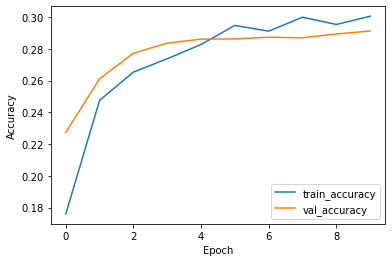

In [22]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')